Notebook to demonstrate I can make a json file and plot an edgelist file


In [24]:
import pandas as pd
import graspy
import networkx as nx
import numpy as np
%matplotlib inline

In [25]:
df = pd.read_csv("exampleEdgelist.csv")

In [26]:
df

,Node Source,Node Target,weight
0,aa,dd,22
1,bb,ff,3
2,cc,ee,0
3,dd,aa,1
4,ee,cc,11
5,ff,ee,10


In [59]:
new = np.full((6,6), 0).astype(int)
# for row in range(6):
#     for col in range(6):
#         new[row, col] = 
        
# newmap = enumerate(df.values[:,0]); print(list(newmap))
id_to_index_map = {df.values[i,0] : i for i in range(len(df.values))}; print(newmap)

for index, match, val in df.values:
    print(f"index: {index}, match: {match}, val: {val}")
    new[id_to_index_map[index], id_to_index_map[match]] = val

print('    ',*newmap.keys())
for i, row in enumerate(new):
    print(df.values[i, 0], row)

print(new)

{'aa': 0, 'bb': 1, 'cc': 2, 'dd': 3, 'ee': 4, 'ff': 5}
index: aa, match: dd, val: 22
index: bb, match: ff, val: 3
index: cc, match: ee, val: 0
index: dd, match: aa, val: 1
index: ee, match: cc, val: 11
index: ff, match: ee, val: 10
     aa bb cc dd ee ff
aa [ 0  0  0 22  0  0]
bb [0 0 0 0 0 3]
cc [0 0 0 0 0 0]
dd [1 0 0 0 0 0]
ee [ 0  0 11  0  0  0]
ff [ 0  0  0  0 10  0]
[[ 0  0  0 22  0  0]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  0 10  0]]


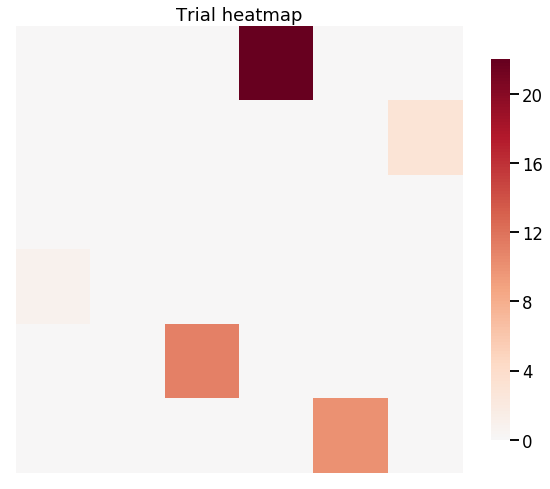

In [60]:
from graspy.plot import heatmap

title = 'Trial heatmap'

fig= heatmap(new, title=title)